
Top 10 RDCs by Research Output:
           RDC  Research Output Count
0      Boston                   1444
1    Michigan                   1342
2      Baruch                    970
3  Penn State                    869
4    Triangle                    752
5    Stanford                    725
6     Chicago                    652
7     Atlanta                    551
8        UIUC                    410
9    Kentucky                    351

Top 10 Most Prolific Authors:
             Author  Publications
0          J. Wang           682
1          Z. Wang           485
2         Y. Zhang           343
3           J. Lee           323
4         L. Zhang           311
5        M. Finger           294
6          Y. Chen           293
7        A. Sharma           288
8  S. Bhattacharya           277
9           H. Kim           264

Citation Insight:
 No citation data available.

Average research outputs per RDC: 806.6

Top Co-Author Pairs:
                                       Author Pair  C

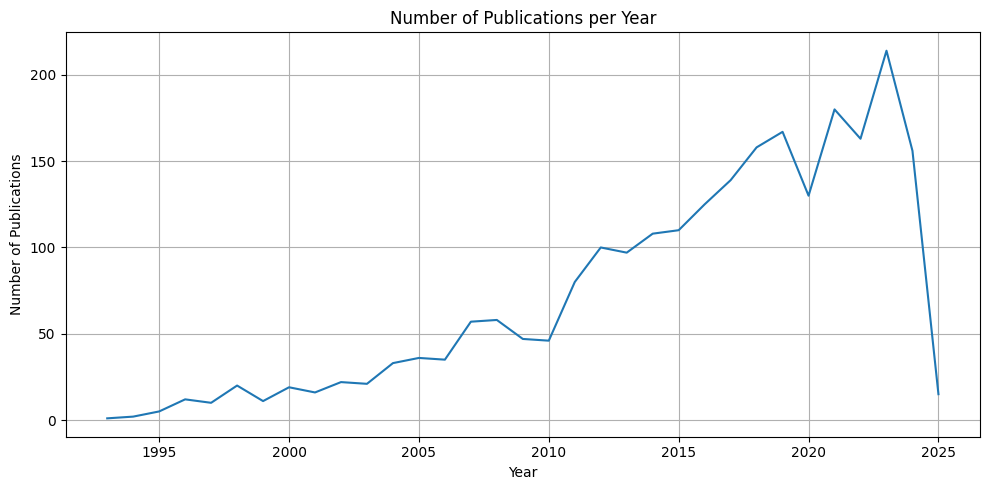

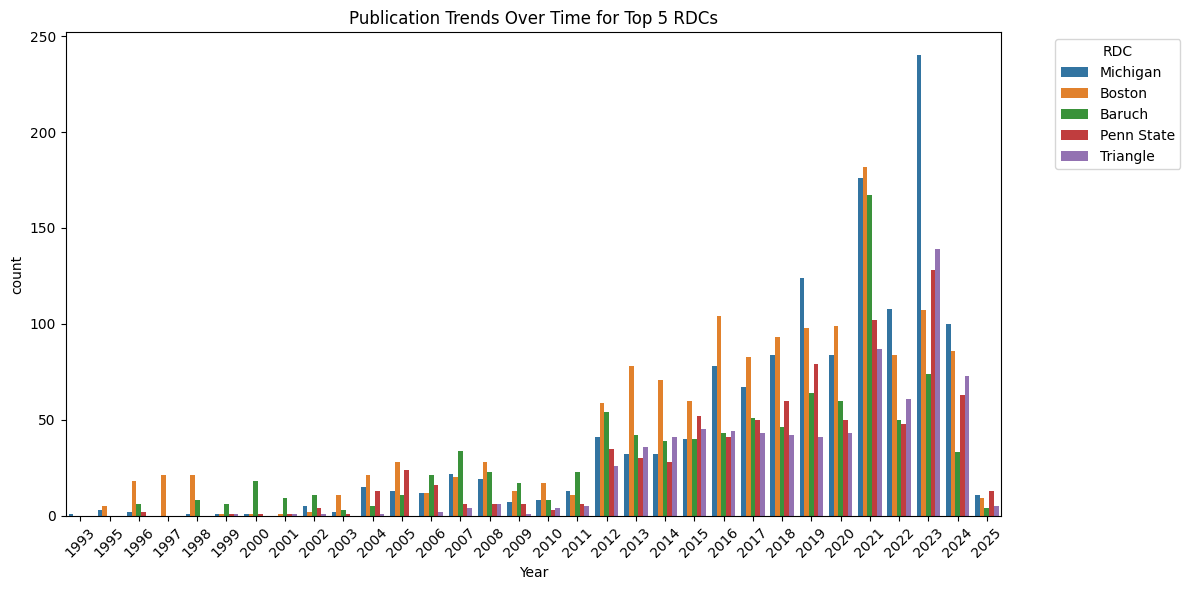


Plots saved: 'publications_per_year.png' and 'top_rdc_trends.png'


In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For enhancing visualizations
from collections import Counter  # For counting occurrences of items
from itertools import combinations  # For generating combinations of items
import os  # For interacting with the operating system


def load_data(filepath):
    """Loads data from a CSV file into a pandas DataFrame.

    Args:
        filepath (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: The loaded data.
    """
    return pd.read_csv(filepath)


def analyze_rdc(df):
    """Analyzes the Research Development Classification (RDC) of publications.

    Args:
        df (pandas.DataFrame): The input DataFrame containing publication data.

    Returns:
        pandas.DataFrame: A DataFrame with the top 10 RDCs and their counts.
    """
    # Clean the RDC column by splitting and stripping values
    df['RDC_clean'] = df['RDC'].fillna('').apply(lambda x: [i.strip() for i in str(x).split(',')])
    # Count the occurrences of each RDC
    rdc_counts = Counter([rdc for sublist in df['RDC_clean'] for rdc in sublist if rdc])
    # Create a DataFrame with the top 10 RDCs and their counts
    return pd.DataFrame(rdc_counts.most_common(10), columns=['RDC', 'Research Output Count'])


def plot_publications_per_year(df):
    """Plots the number of publications per year.

    Args:
        df (pandas.DataFrame): The input DataFrame containing publication data.
    """
    # Group publications by year and count them
    pubs_by_year = df[df['OutputYear'].notnull()].groupby('OutputYear').size()
    # Create a line plot
    plt.figure(figsize=(10, 5))  # Set figure size
    sns.lineplot(x=pubs_by_year.index.astype(int), y=pubs_by_year.values)  # Plot the data
    plt.title("Number of Publications per Year")  # Set plot title
    plt.xlabel("Year")  # Set x-axis label
    plt.ylabel("Number of Publications")  # Set y-axis label
    plt.grid(True)  # Add gridlines
    plt.tight_layout()  # Adjust layout for better spacing
    plt.savefig("publications_per_year.png")  # Save the plot to a file
    plt.show()  # Display the plot


def analyze_authors(df):
    """Analyzes the authors of publications.

    Args:
        df (pandas.DataFrame): The input DataFrame containing publication data.

    Returns:
        pandas.DataFrame: A DataFrame with the top 10 authors and their publication counts.
    """
    # Clean the author column by splitting and stripping values
    df['author_clean'] = df['author'].fillna('').apply(lambda x: [a.strip() for a in str(x).split(';')])
    # Count the occurrences of each author
    author_counts = Counter([auth for sublist in df['author_clean'] for auth in sublist if auth])
    # Create a DataFrame with the top 10 authors and their counts
    return pd.DataFrame(author_counts.most_common(10), columns=['Author', 'Publications'])


def analyze_citations(df):
    """Analyzes the citation data of publications.

    Args:
        df (pandas.DataFrame): The input DataFrame containing publication data.

    Returns:
        pandas.Series or str: Descriptive statistics of citations if available, otherwise a message.
    """
    if 'cited_by_count' in df.columns:
        return df['cited_by_count'].describe()  # Calculate descriptive statistics for citations
    else:
        return "No citation data available."  # Return a message if citation data is not found


def average_outputs_per_rdc(rdc_df):
    """Calculates the average research outputs per RDC.

    Args:
        rdc_df (pandas.DataFrame): The DataFrame containing RDC data.

    Returns:
        float: The average research outputs per RDC, rounded to 2 decimal places.
    """
    return round(rdc_df['Research Output Count'].sum() / len(rdc_df), 2)


def analyze_coauthors(df):
    """Analyzes co-authorship patterns.

    Args:
        df (pandas.DataFrame): The input DataFrame containing publication data.

    Returns:
        pandas.DataFrame: A DataFrame with the top 10 co-author pairs and their co-authored publication counts.
    """
    pair_counter = Counter()  # Initialize a counter for co-author pairs
    for authors in df['author_clean']:
        if len(authors) <= 10:  # Consider only publications with up to 10 authors
            for pair in combinations(sorted(set(authors)), 2):  # Generate combinations of authors
                pair_counter[pair] += 1  # Increment the count for each co-author pair
    # Create a DataFrame with the top 10 co-author pairs and their counts
    return pd.DataFrame(pair_counter.most_common(10), columns=["Author Pair", "Co-authored Publications"])


def plot_top_rdc_trends(df, top_rdc_df):
    """Plots the publication trends over time for the top RDCs.

    Args:
        df (pandas.DataFrame): The input DataFrame containing publication data.
        top_rdc_df (pandas.DataFrame): The DataFrame containing the top RDCs.
    """
    rdc_years = []
    for _, row in df.iterrows():  # Iterate over each row of the DataFrame
        if pd.notna(row['OutputYear']):  # Check if the OutputYear is not null
            for rdc in row['RDC_clean']:  # Iterate over each RDC in the RDC_clean column
                rdc_years.append((rdc.strip(), int(row['OutputYear'])))  # Append the RDC and year to the list
    rdc_years_df = pd.DataFrame(rdc_years, columns=["RDC", "Year"])  # Create a DataFrame from the list
    top_rdc_names = top_rdc_df['RDC'].tolist()  # Get the list of top RDC names
    filtered = rdc_years_df[rdc_years_df['RDC'].isin(top_rdc_names[:5])]  # Filter the DataFrame to include only the top 5 RDCs

    plt.figure(figsize=(12, 6))  # Set figure size
    sns.countplot(data=filtered, x="Year", hue="RDC")  # Create a count plot
    plt.title("Publication Trends Over Time for Top 5 RDCs")  # Set plot title
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title="RDC", bbox_to_anchor=(1.05, 1), loc='upper left')  # Add a legend
    plt.tight_layout()  # Adjust layout for better spacing
    plt.savefig("top_rdc_trends.png")  # Save the plot to a file
    plt.show()  # Display the plot


def main():
    """The main function that executes the analysis."""
    filepath = "ResearchOutputs_Group3.csv"  # Set the filepath
    if not os.path.exists(filepath):  # Check if the file exists
        print(f"File not found: {filepath}")  # Print an error message if the file is not found
        return  # Exit the function if the file is not found

    df = load_data(filepath)  # Load the data
    rdc_df = analyze_rdc(df)  # Analyze the RDCs
    author_df = analyze_authors(df)  # Analyze the authors

    print("\nTop 10 RDCs by Research Output:\n", rdc_df)  # Print the top 10 RDCs
    print("\nTop 10 Most Prolific Authors:\n", author_df)  # Print the top 10 authors

    citation_stats = analyze_citations(df)  # Analyze the citations
    print("\nCitation Insight:\n", citation_stats)  # Print the citation statistics

    avg_output = average_outputs_per_rdc(rdc_df)  # Calculate the average outputs per RDC
    print(f"\nAverage research outputs per RDC: {avg_output}")  # Print the average outputs per RDC

    coauthor_df = analyze_coauthors(df)  # Analyze the co-authors
    print("\nTop Co-Author Pairs:\n", coauthor_df)  # Print the top co-author pairs

    # Plotting
    plot_publications_per_year(df)  # Plot the publications per year
    plot_top_rdc_trends(df, rdc_df)  # Plot the top RDC trends

    print("\nPlots saved: 'publications_per_year.png' and 'top_rdc_trends.png'")  # Print a message indicating that the plots have been saved


if __name__ == "__main__":
    main()  # Call the main function if the script is executed